In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [76]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

In [77]:
# data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

In [78]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [79]:
missing_values = df.isnull().sum()
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [80]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [81]:
#Replaces empety values
def replace_NAN(d):
    missing_values = d.isnull().sum()
    means = d.mean()
    for col in d.columns:
        if missing_values[col] > 0:
            d[col].fillna(means[col], inplace=True)
    return d



In [104]:
means = df.mean()
print(means)

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64


In [82]:
df = replace_NAN(df)

In [83]:
missing_values = df.isnull().sum()
print(missing_values)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [84]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


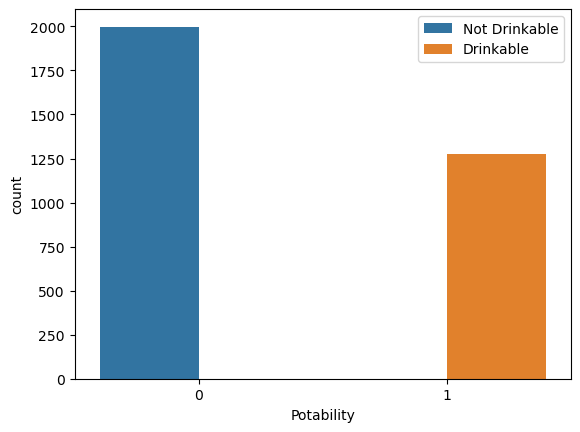

In [85]:
#visiualizing the data and class distribution 

sns.countplot(data=df, x= 'Potability', hue= 'Potability')
plt.legend(labels= ['Not Drinkable', 'Drinkable'])


<Axes: >

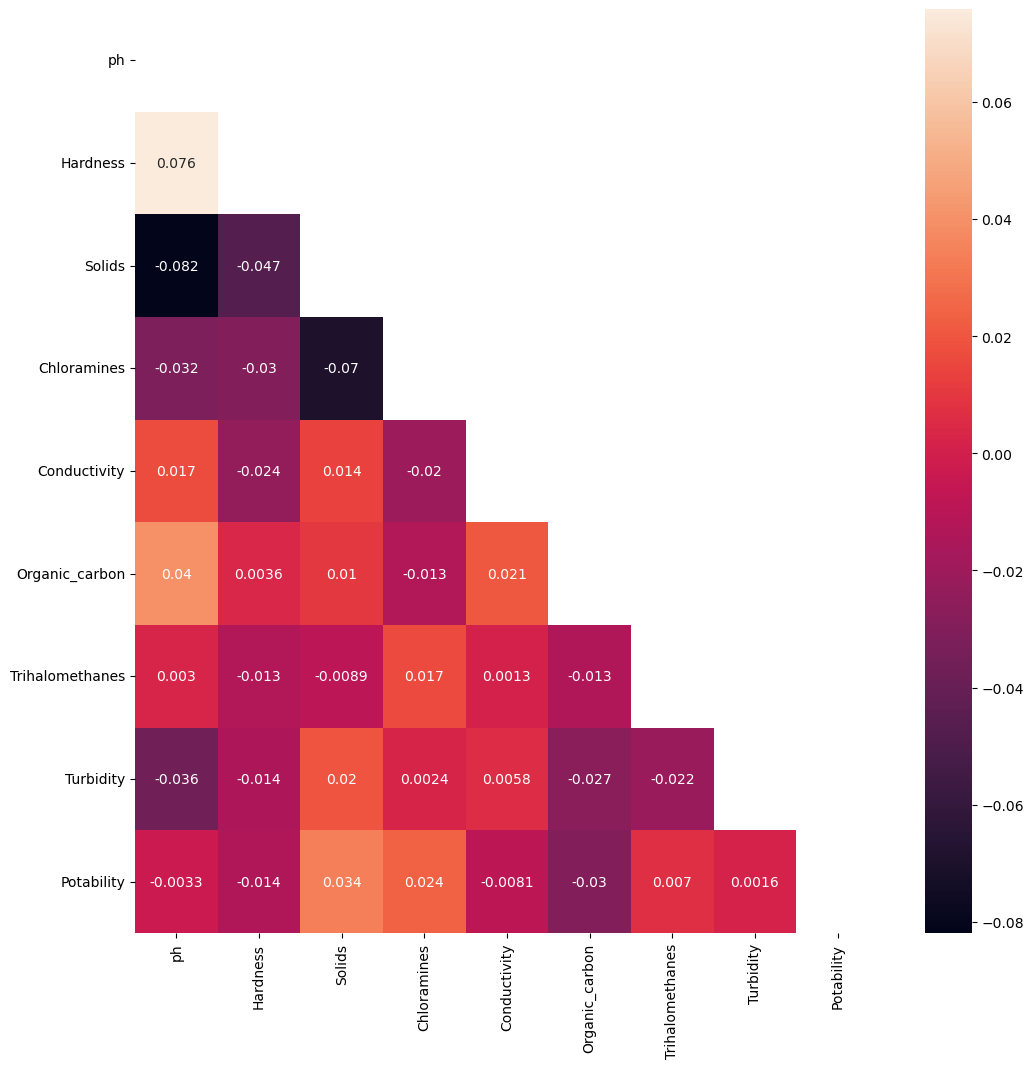

In [107]:
cor = df.corr()
m = np.triu(cor)
plt.figure(figsize = (12,12))
sns.heatmap(cor, annot= True, mask =m)

#Zero correlations, This dataset would have been best for naive bayes, lets see how k-neigbhor performs

In [87]:
# #distribution before replacing nulls 
# for col in data.columns:
#     sns.histplot(data=data, x=col, kde = 'True',  hue= 'Potability')
# #     plt.legend(labels= ['Not Drinkable', 'Drinkable'])
#     plt.show()
    

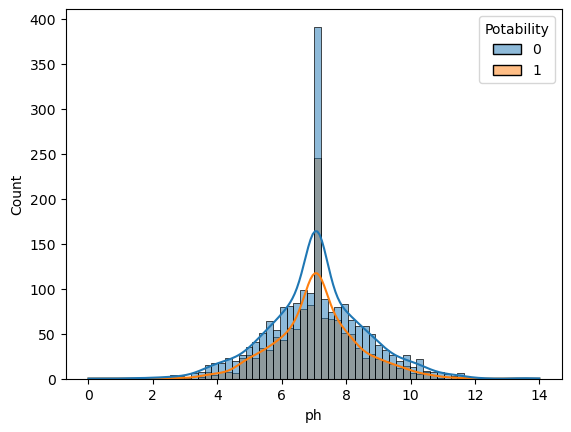

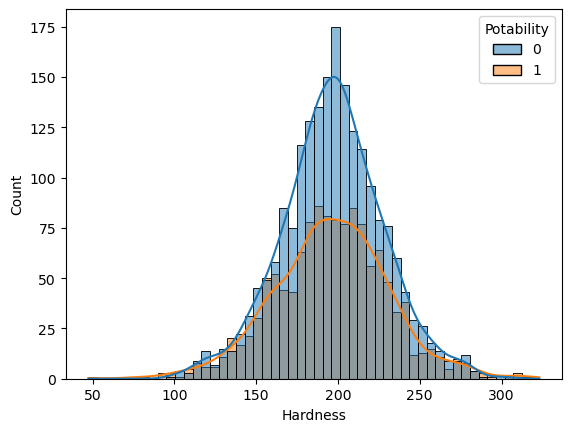

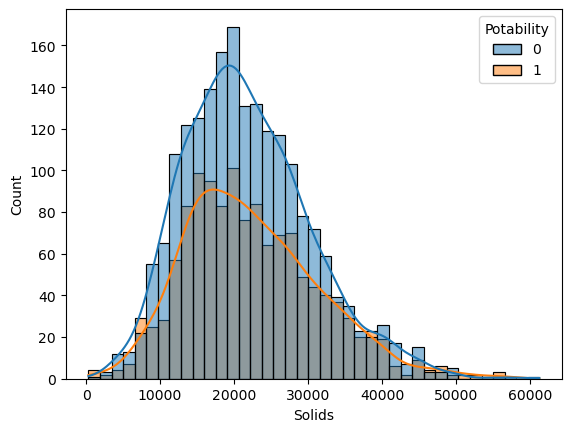

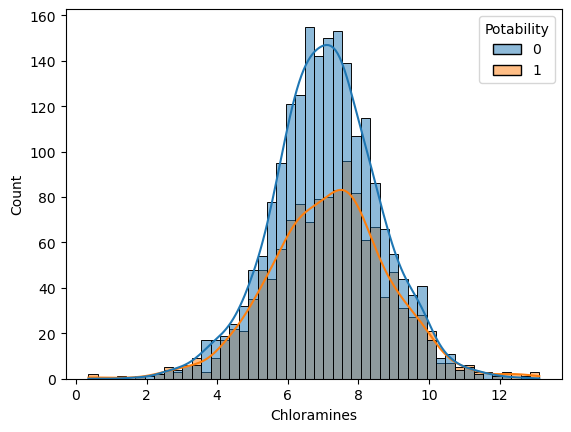

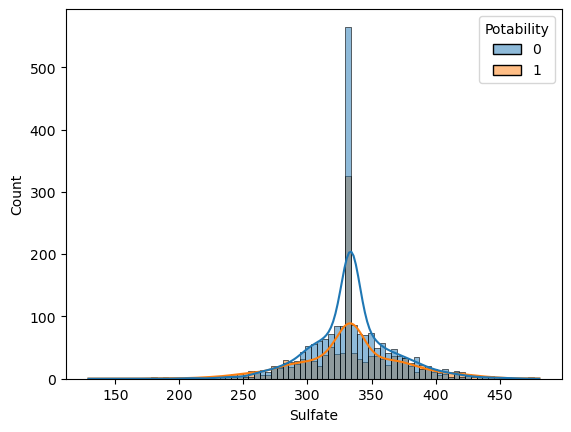

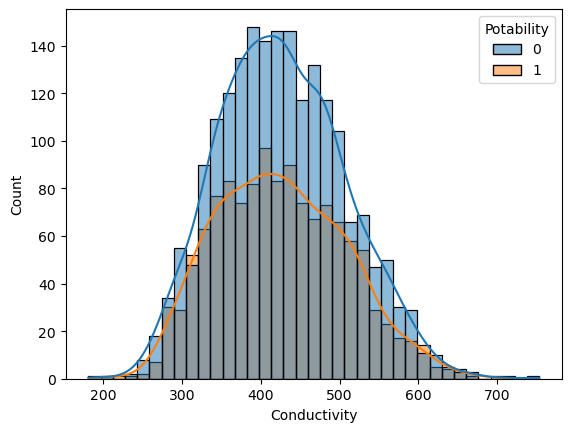

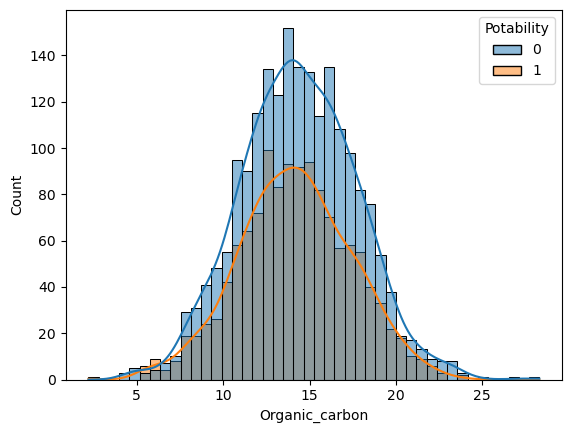

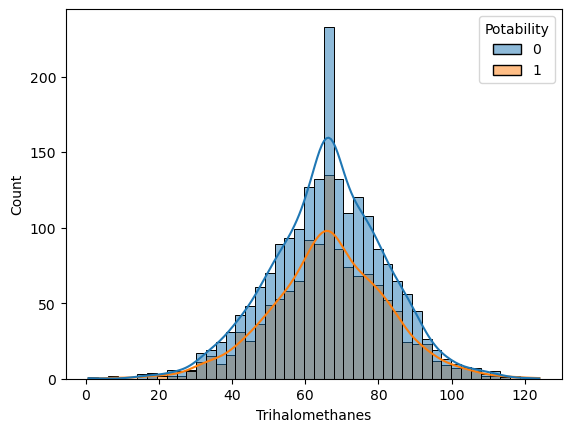

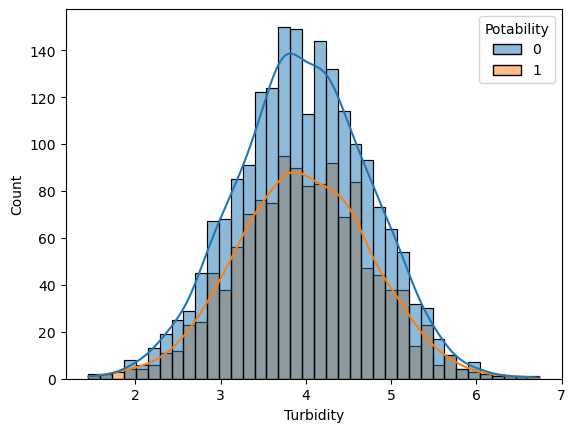

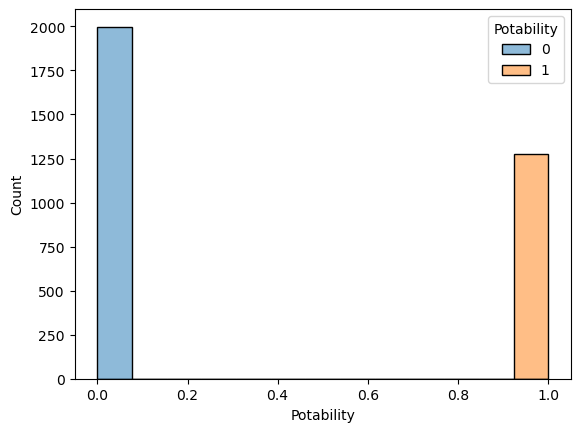

In [88]:
for col in df.columns:
    sns.histplot(data=df, x=col, kde = 'True',  hue= 'Potability')
#     plt.legend(labels= ['Not Drinkable', 'Drinkable'])
    plt.show()
    

In [2]:
#Most of the attributes follow normal distribution 

def train_eval(data):

    # Standardizing the dataset 
    data = data.sample(frac=1)
    data_x= data.iloc[:, :-1]
    data_y = data.iloc[:,-1]
    scaler = StandardScaler()
    data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)
    
    #test train split
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)
    
    #model creation
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    
    #evaluation
    predictions = model.predict(x_test)
    report = classification_report(y_test, predictions)
    print(report)
    matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(matrix, annot= True)



              precision    recall  f1-score   support

           0       0.68      0.77      0.72       406
           1       0.52      0.40      0.45       250

    accuracy                           0.63       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656



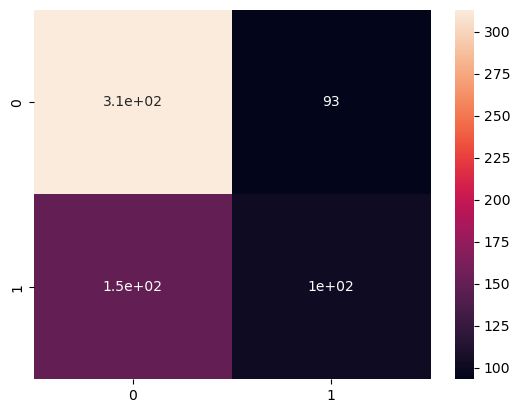

In [90]:
train_eval(df)

In [91]:
#Poor accuracy, maybe due to imbalanced data

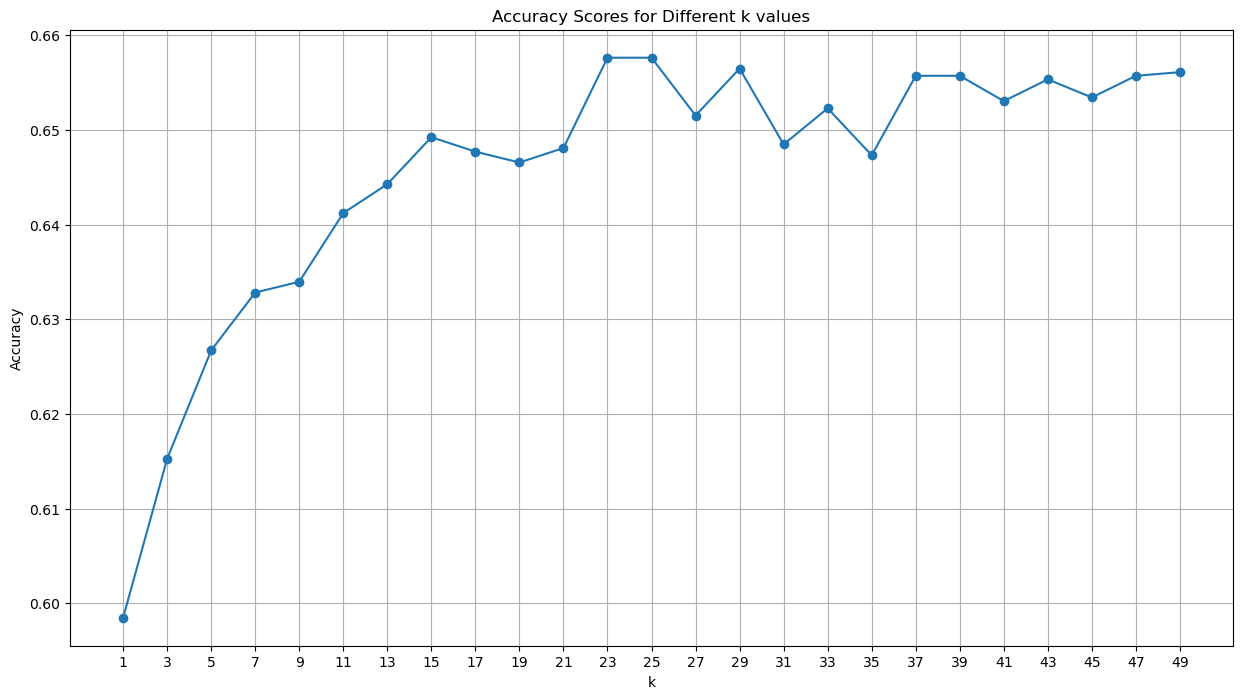

In [92]:
#Testing k-values
data=df
data = data.sample(frac=1)
data_x= data.iloc[:, :-1]
data_y = data.iloc[:,-1]
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

#test train split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)




k_values = list(range(1,51, 2))
accu = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors =k)
    scores = cross_val_score(m, x_train, y_train, cv=10,  scoring='accuracy')
    accu.append(scores.mean())
    
# Plotting accuracy scores versus k values
plt.figure(figsize =(15,8))
plt.plot(k_values, accu, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('Accuracy Scores for Different k values')
plt.grid(True)
plt.show()

In [93]:
#Try dropping sulphata colmn 
df = df.drop(columns = 'Sulfate', axis =1 )
df.head(5)

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


              precision    recall  f1-score   support

           0       0.64      0.77      0.70       397
           1       0.49      0.34      0.40       259

    accuracy                           0.60       656
   macro avg       0.56      0.55      0.55       656
weighted avg       0.58      0.60      0.58       656



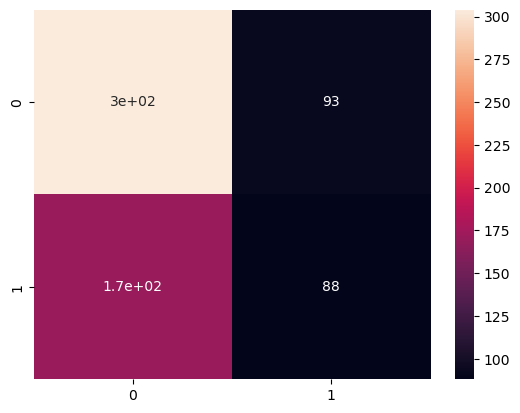

In [94]:
train_eval(df)

In [95]:
#Lets tackel class imbalance problem, by downsampaling not drinkable instances(np)

p = data[data['Potability']==1]
not_p = data[data['Potability']==0]
sampled_data = not_p.sample(n=1300)

#Shuffle the sampled data
data_new = pd.concat([p, sampled_data], axis =0)
#shuffle
s_data = data_new.sample(frac=1)
s_data.head()

sns.countplot(data=s_data, x= 'Potability', hue= 'Potability')
# plt.legend(labels= ['Not Drinkable', 'Drinkable'])



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
757,8.370440,231.442553,15063.814968,12.279374,333.775777,422.293819,15.027088,67.503004,3.210635,1
1603,5.941943,249.163567,14778.032875,6.390679,335.796082,517.546817,15.931879,66.551419,4.302179,1
1591,7.918087,175.337240,29565.711108,7.432180,333.775777,322.533423,11.309245,70.116746,4.640043,1
1482,7.015333,222.113004,16351.226287,7.838884,353.189806,420.136873,8.840514,66.543935,5.251223,1
388,6.448931,240.244771,13979.165723,9.077985,314.590477,473.751302,17.416903,84.024786,3.622196,1


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
557,9.515141,199.081317,9082.816175,5.976550,367.230792,501.446834,12.877123,55.770690,3.812888,0
1151,4.303575,227.007086,7323.302301,7.490508,326.695199,412.896404,12.906730,68.748918,2.010537,1
2549,7.096098,206.827818,24548.598299,5.379861,333.775777,365.400809,12.495189,79.295423,4.569760,0
1985,6.266800,187.829617,27577.213623,9.141597,322.917848,277.050802,13.290252,59.454325,3.652845,1
3168,6.283319,228.524839,11601.642382,6.322219,333.775777,414.784442,11.679676,88.345940,4.153990,1


<Axes: xlabel='Potability', ylabel='count'>

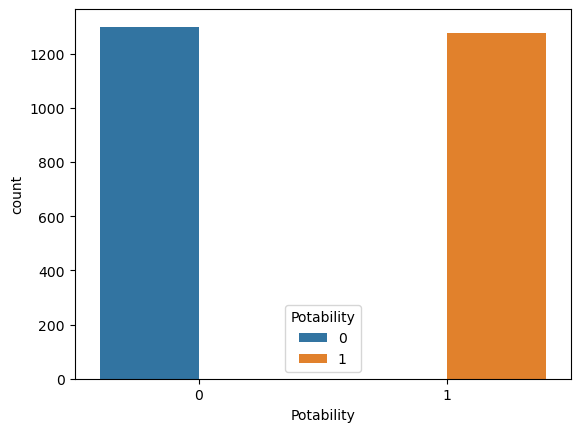

In [97]:
#visiualizing the data and class distribution 



              precision    recall  f1-score   support

           0       0.61      0.62      0.62       265
           1       0.59      0.58      0.59       251

    accuracy                           0.60       516
   macro avg       0.60      0.60      0.60       516
weighted avg       0.60      0.60      0.60       516



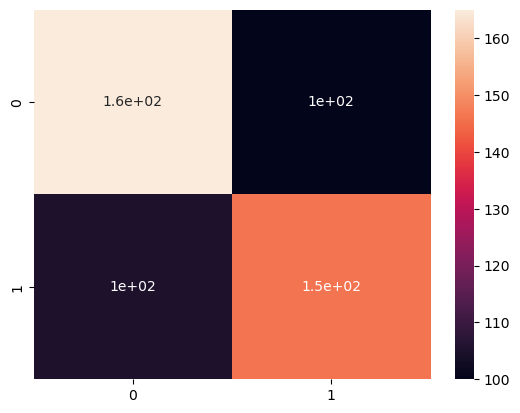

In [98]:
#lets train model
#replacing NAN
# s_data = replace_NAN(s_data)
train_eval(s_data)

In [99]:
# data = s_data
# data_x= data.iloc[:, :-1]
# data_y = data.iloc[:,-1]
# scaler = StandardScaler()
# data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

# #test train split
# x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)




# k_values = list(range(1,51, 2))
# accu = []
# for k in k_values:
#     m = KNeighborsClassifier(n_neighbors =k)
#     scores = cross_val_score(m, x_train, y_train, cv=10,  scoring='accuracy')
#     accu.append(scores.mean())
    
# # Plotting accuracy scores versus k values
# plt.figure(figsize =(15,8))
# plt.plot(k_values, accu, marker='o')
# plt.xlabel('k')
# plt.ylabel('Accuracy')
# plt.xticks(k_values)
# plt.title('Accuracy Scores for Different k values')
# plt.grid(True)
# plt.show()


In [100]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


              precision    recall  f1-score   support

           0       0.70      0.75      0.72       420
           1       0.49      0.43      0.46       236

    accuracy                           0.63       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.63      0.63       656



<Axes: >

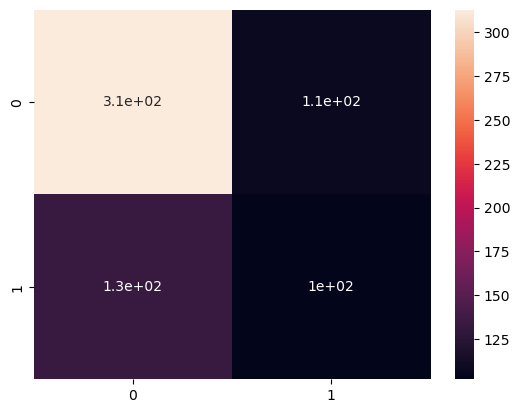

In [101]:

data_x= data.iloc[:, :-1]
data_y = data.iloc[:,-1]
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

#test train split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)

#model creation
model = KNeighborsClassifier(metric = 'cosine')
model.fit(x_train, y_train)

#evaluation
predictions = model.predict(x_test)
report = classification_report(y_test, predictions)
print(report)
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot= True)

(2011, 10)


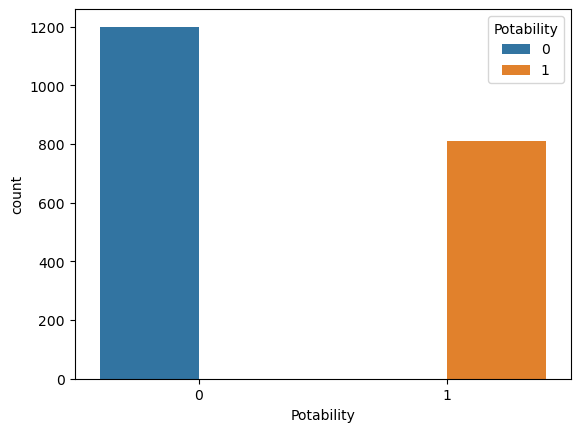

In [3]:
# Lets try dropping all the rows with missing values 
data = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data.dropna(inplace =True)

sns.countplot(data=data, x = 'Potability', hue = 'Potability' )
print(data.shape)

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       238
           1       0.58      0.38      0.46       165

    accuracy                           0.63       403
   macro avg       0.62      0.59      0.59       403
weighted avg       0.62      0.63      0.61       403



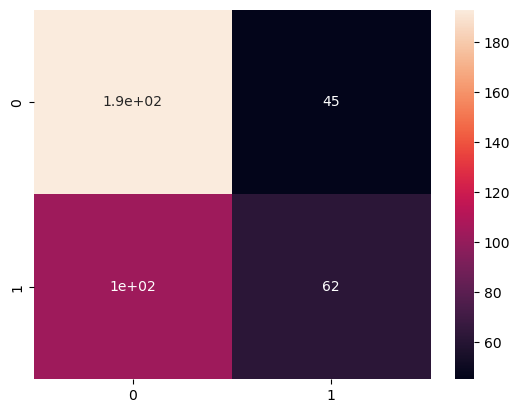

In [4]:
train_eval(data)

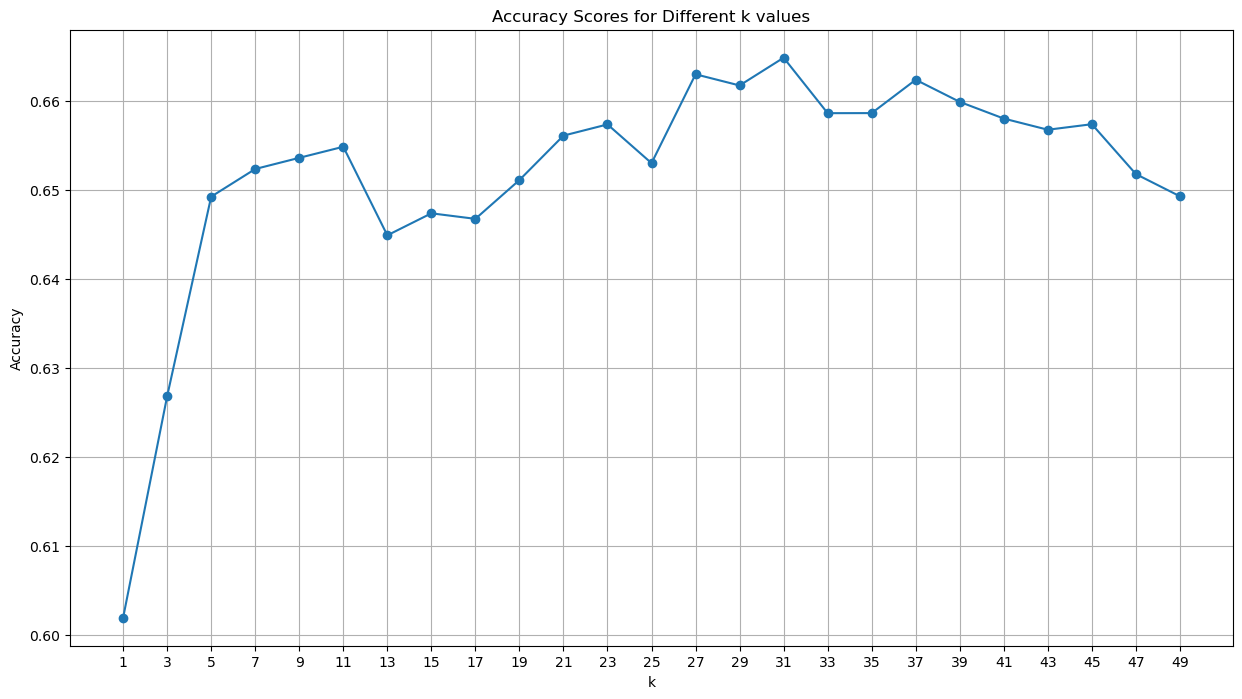

In [5]:
data = data.sample(frac=1)
data_x= data.iloc[:, :-1]
data_y = data.iloc[:,-1]
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

#test train split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)




k_values = list(range(1,51, 2))
accu = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors =k)
    scores = cross_val_score(m, x_train, y_train, cv=10,  scoring='accuracy')
    accu.append(scores.mean())
    
# Plotting accuracy scores versus k values
plt.figure(figsize =(15,8))
plt.plot(k_values, accu, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('Accuracy Scores for Different k values')
plt.grid(True)
plt.show()

In [ ]:
 dataset = prep.skewcorrect(dataset,except_columns=['Potability'])

In [7]:
#balancing the class 
data[data['Potability']==1].shape

(811, 10)

<Axes: xlabel='Potability', ylabel='count'>

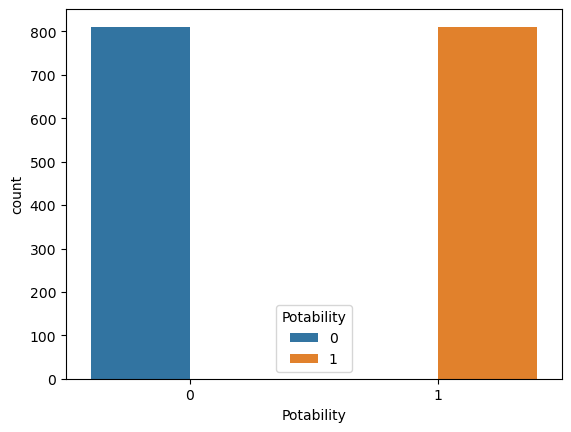

In [8]:
#Lets tackel class imbalance problem, by downsampaling not drinkable instances(np)

p = data[data['Potability']==1]
not_p = data[data['Potability']==0]
sampled_data = not_p.sample(n=811)

#Shuffle the sampled data
data_new = pd.concat([p, sampled_data], axis =0)
#shuffle
s_data = data_new.sample(frac=1)
s_data.head()

sns.countplot(data=s_data, x= 'Potability', hue= 'Potability')
# plt.legend(labels= ['Not Drinkable', 'Drinkable'])



              precision    recall  f1-score   support

           0       0.54      0.62      0.57       147
           1       0.64      0.56      0.59       178

    accuracy                           0.58       325
   macro avg       0.59      0.59      0.58       325
weighted avg       0.59      0.58      0.59       325



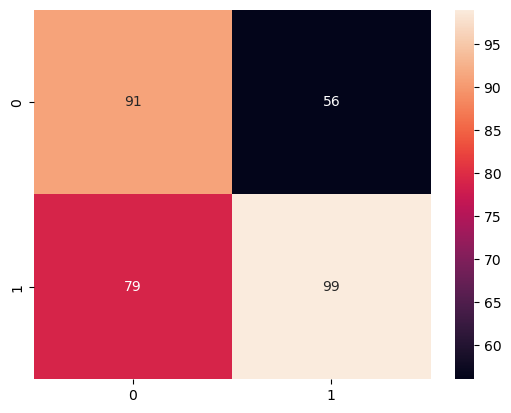

In [9]:
train_eval(s_data)

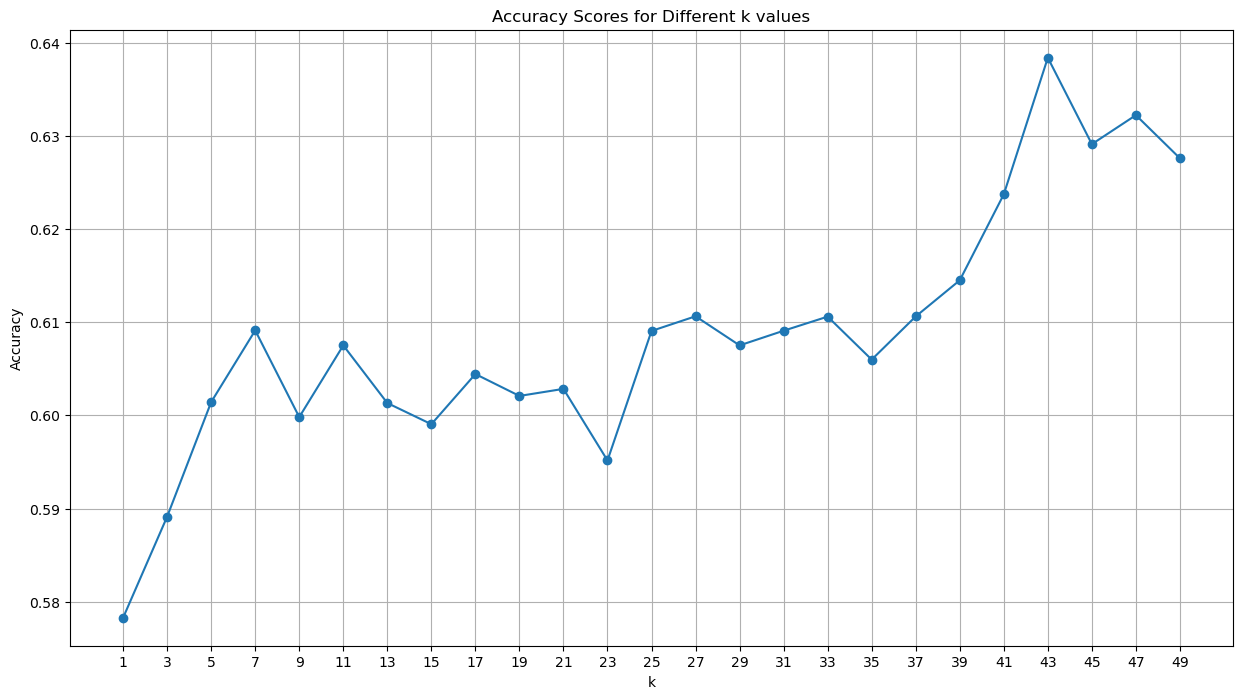

In [10]:
data = s_data
data_x= data.iloc[:, :-1]
data_y = data.iloc[:,-1]
scaler = StandardScaler()
data_x = pd.DataFrame(scaler.fit_transform(data_x), columns = data_x.columns)

#test train split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=41)




k_values = list(range(1,51, 2))
accu = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors =k)
    scores = cross_val_score(m, x_train, y_train, cv=10,  scoring='accuracy')
    accu.append(scores.mean())
    
# Plotting accuracy scores versus k values
plt.figure(figsize =(15,8))
plt.plot(k_values, accu, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('Accuracy Scores for Different k values')
plt.grid(True)
plt.show()

Not much improvement